In [1]:
## Has to be run as root
## $ docker exec -it -u root suspicious_hermann /bin/bash
## # apt-get update
## # apt-get install graphviz

## Installing this results in an error, but if not installed there's a warning.  Don't care, not going to fix
# !pip install pulp
#!pip install pm4py

import datetime
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pm4py

In [2]:
from gen_data import Data_Generator

generator = Data_Generator()
tab_df = generator.gen_tabular_data()
tab_df.head()

,id,message,sensed,transfer,submitted,transfer2
0,id_0,Message regarding entity [entity_id_0] tracked...,2024-10-22 16:07:15.912309,2024-10-22 16:21:48.912309,2024-10-22 16:42:42.912309,2024-10-22 16:44:23.912309
1,idx_1,Message regarding entity [entity_idx_1] tracke...,2024-10-22 16:52:09.912309,2024-10-22 16:54:23.912309,2024-10-22 17:00:26.912309,2024-10-22 17:01:48.912309
2,idx_2,Message regarding entity [entity_idx_2] tracke...,2024-10-22 16:45:45.912309,NaT,NaT,NaT
3,idx_3,Message regarding entity [entity_idx_3] tracke...,2024-10-22 16:49:53.912309,2024-10-22 17:10:45.912309,2024-10-22 17:35:10.912309,2024-10-22 17:36:24.912309
4,id_4,Message regarding entity [entity_id_4] tracked...,2024-10-22 15:57:37.912309,2024-10-22 16:10:48.912309,2024-10-22 16:35:28.912309,2024-10-22 16:36:24.912309


In [3]:
log_df = generator.gen_event_log_data()
log_df.head()

,id,message,state,timestamp
0,id_0,Message regarding entity [entity_id_0] tracked...,sensed,2024-10-22 16:44:29.912309
1,id_0,Message regarding entity [entity_id_0] tracked...,transfer,2024-10-22 17:00:38.912309
2,id_0,Message regarding entity [entity_id_0] tracked...,submitted,2024-10-22 17:25:56.912309
3,id_0,Message regarding entity [entity_id_0] tracked...,transfer2,2024-10-22 17:27:30.912309
4,1,Message regarding entity [entity_1] tracked by...,sensed,2024-10-22 16:22:38.912309


In [4]:
log_df["state"].unique()

array(['sensed', 'transfer', 'submitted', 'transfer2'], dtype=object)

In [5]:
pm4_log = pm4py.format_dataframe(log_df, case_id="id", activity_key="state", timestamp_key="timestamp")
print(f"Start Activities: {pm4py.get_start_activities(pm4_log)}")
print(f"End Activities: {pm4py.get_end_activities(pm4_log)}")

Start Activities: {'sensed': 500}
End Activities: {'transfer': 55, 'transfer2': 358, 'sensed': 42, 'submitted': 45}


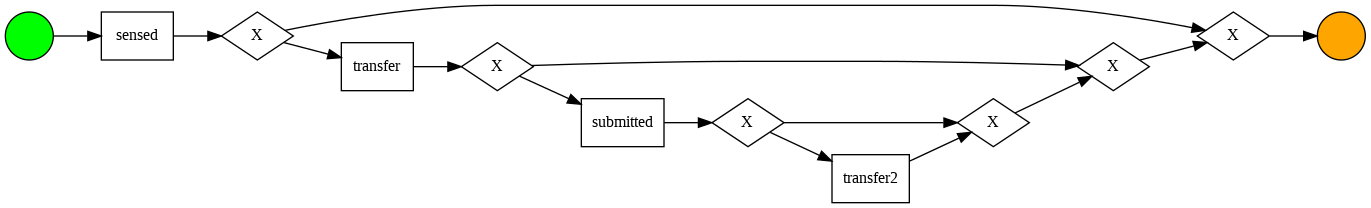

In [6]:
bpmn_model = pm4py.discover_bpmn_inductive(pm4_log)
pm4py.view_bpmn(bpmn_model)

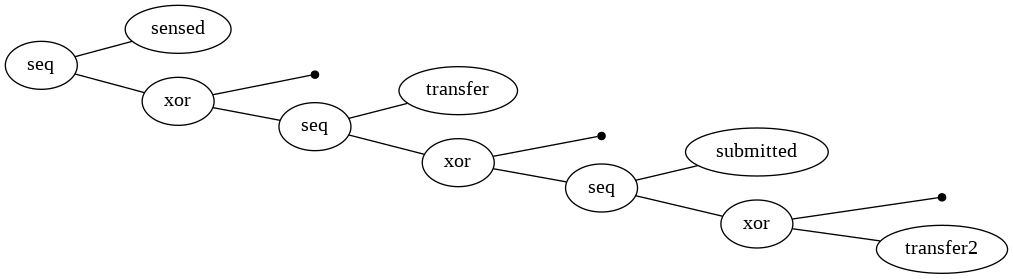

In [7]:
process_tree = pm4py.discover_process_tree_inductive(pm4_log)
pm4py.view_process_tree(process_tree)

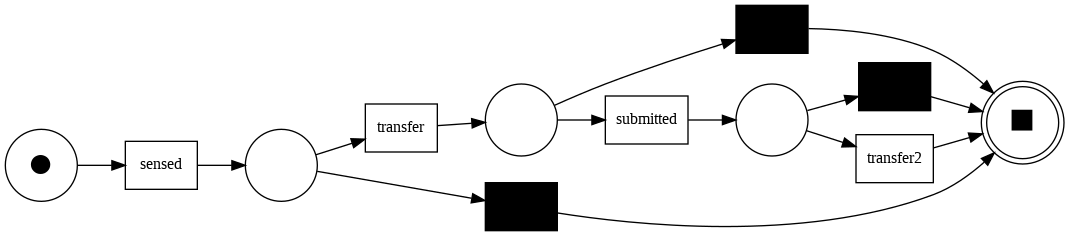

In [8]:
net1, im1, fm1 = pm4py.convert_to_petri_net(process_tree)
pm4py.view_petri_net(net1,im1,fm1)

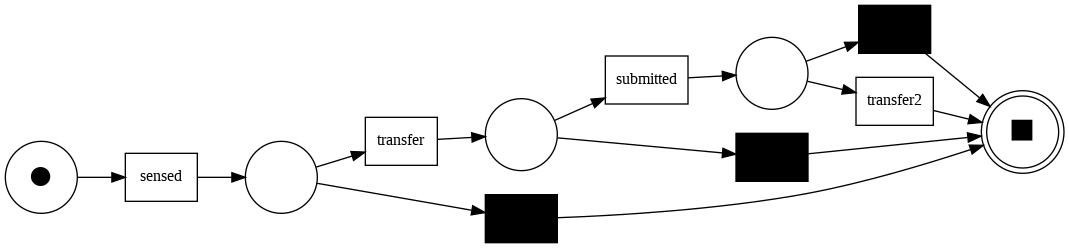

In [9]:
net2, im2, fm2 = pm4py.discover_petri_net_inductive(pm4_log)
pm4py.view_petri_net(net2, im2, fm2)

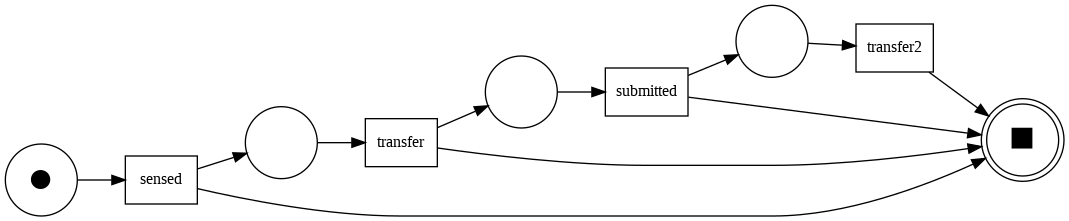

In [10]:
net3, im3, fm3 = pm4py.discover_petri_net_alpha(pm4_log)
pm4py.view_petri_net(net3, im3, fm3)

/tmp/ipykernel_20740/322618340.py:1: DeprecatedWarning: discover_petri_net_alpha_plus is deprecated as of 2.3.0 and will be removed in 3.0.0. this method will be removed in a future release.
  net4, im4, fm4 = pm4py.discover_petri_net_alpha_plus(pm4_log)


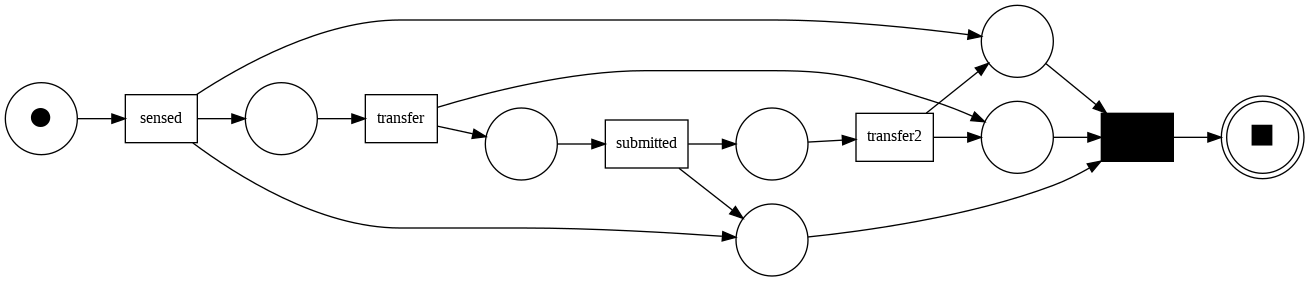

In [11]:
net4, im4, fm4 = pm4py.discover_petri_net_alpha_plus(pm4_log)
pm4py.view_petri_net(net4, im4, fm4)

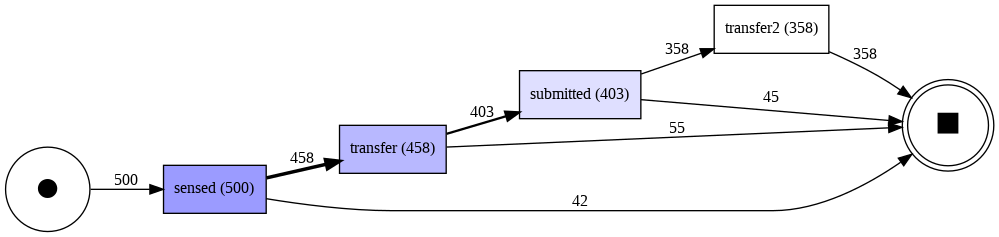

In [12]:
dfg, start_activities, end_activities = pm4py.discover_dfg(pm4_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

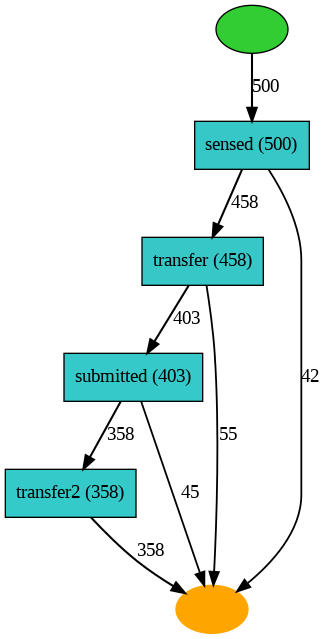

In [13]:
map = pm4py.discover_heuristics_net(pm4_log)
pm4py.view_heuristics_net(map)

In [15]:
import plotly.express as px
log_df.head()

,id,message,state,timestamp,case:concept:name,concept:name,time:timestamp
0,id_0,Message regarding entity [entity_id_0] tracked...,sensed,2024-10-22 16:44:29.912309+00:00,id_0,sensed,2024-10-22 16:44:29.912309+00:00
1,id_0,Message regarding entity [entity_id_0] tracked...,transfer,2024-10-22 17:00:38.912309+00:00,id_0,transfer,2024-10-22 17:00:38.912309+00:00
2,id_0,Message regarding entity [entity_id_0] tracked...,submitted,2024-10-22 17:25:56.912309+00:00,id_0,submitted,2024-10-22 17:25:56.912309+00:00
3,id_0,Message regarding entity [entity_id_0] tracked...,transfer2,2024-10-22 17:27:30.912309+00:00,id_0,transfer2,2024-10-22 17:27:30.912309+00:00
4,1,Message regarding entity [entity_1] tracked by...,sensed,2024-10-22 16:22:38.912309+00:00,1,sensed,2024-10-22 16:22:38.912309+00:00


In [16]:
unq_wrk_id = log_df[log_df["state"] == "submitted"]["id"].unique()
work_min = log_df[log_df.isin({"id": unq_wrk_id})["id"]]
work_min = work_min.sort_values(["id", "timestamp"])
work_min.head()

,id,message,state,timestamp,case:concept:name,concept:name,time:timestamp
370,109,Message regarding entity [entity_109] tracked ...,sensed,2024-10-22 16:51:12.912309+00:00,109,sensed,2024-10-22 16:51:12.912309+00:00
371,109,Message regarding entity [entity_109] tracked ...,transfer,2024-10-22 17:12:02.912309+00:00,109,transfer,2024-10-22 17:12:02.912309+00:00
372,109,Message regarding entity [entity_109] tracked ...,submitted,2024-10-22 17:33:42.912309+00:00,109,submitted,2024-10-22 17:33:42.912309+00:00
373,109,Message regarding entity [entity_109] tracked ...,transfer2,2024-10-22 17:35:22.912309+00:00,109,transfer2,2024-10-22 17:35:22.912309+00:00
382,112,Message regarding entity [entity_112] tracked ...,sensed,2024-10-22 16:13:27.912309+00:00,112,sensed,2024-10-22 16:13:27.912309+00:00


In [19]:
timeline = { "case": [], "step": [], "start": [], "stop": [] }

prev_row = None
for index, row in work_min.iterrows():
    try:
        if prev_row["id"] == row["id"]:
            timeline["case"].append(row["id"])
            timeline["step"].append(prev_row["state"])
            timeline["start"].append(prev_row["timestamp"])
            timeline["stop"].append(row["timestamp"])

        prev_row = row
    except:
        print(f"Skipping - {row['id']}, {row['state']} : Probably the first row")
        prev_row = row

timeline = pd.DataFrame(timeline)
timeline = timeline.sort_values(["start"])
timeline.head()

Skipping - 109, sensed : Probably the first row


,case,step,start,stop
403,id_102,sensed,2024-10-22 15:55:16.912309+00:00,2024-10-22 16:09:07.912309+00:00
1055,idx_386,sensed,2024-10-22 15:55:53.912309+00:00,2024-10-22 15:58:33.912309+00:00
315,473,sensed,2024-10-22 15:56:09.912309+00:00,2024-10-22 16:11:34.912309+00:00
930,idx_221,sensed,2024-10-22 15:56:15.912309+00:00,2024-10-22 16:13:09.912309+00:00
318,474,sensed,2024-10-22 15:56:18.912309+00:00,2024-10-22 16:04:47.912309+00:00


In [24]:
fig = px.timeline(timeline, x_start="start", x_end="stop", y="case", color="step")
fig.show()

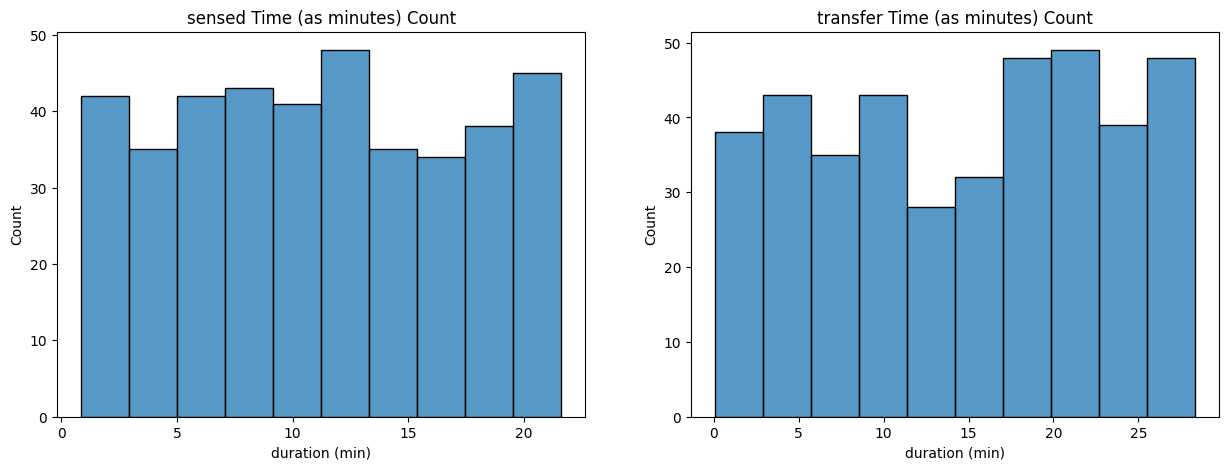

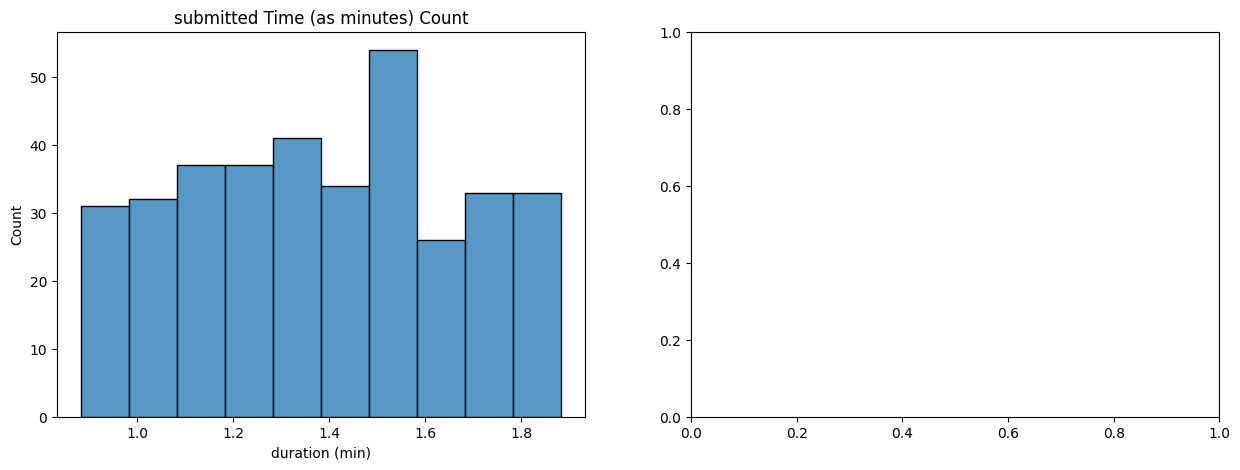

In [23]:
import seaborn as sns

timeline["duration"] = timeline["stop"] - timeline["start"]
timeline["duration (min)"] = timeline["duration"].dt.total_seconds() / 60

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
i = 0

#for s in STEPS[:-2]:
for s in generator.states[:-1]:
    if i == 2:
        plt.show()
        i = 0
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    s_only = timeline[timeline["step"] == s]
    sns.histplot(data=s_only, x="duration (min)", bins=10, ax=axs[i]).set_title(f"{s} Time (as minutes) Count")
    i += 1

if i != 0:
    plt.show()